In [50]:
#work on making this work
import pandas as pd
import numpy as np
from Bio import SeqIO
strains = []
genomes = []
for record in SeqIO.parse('C:/Users/srava/BedfordProjects/zika/results/aligned.fasta', "fasta"):
    strains.append(str(record.id))
    genomes.append(str(record.seq))

In [51]:
len(strains)

519

In [52]:
strains[:5]

['DOM/2016/MA_WGS16_024',
 'DOM/2016/BB_0180',
 'DOM/2016/BB_0115',
 'DOM/2016/BB_0208',
 'DOM/2016/MA_WGS16_007']

In [82]:
# Return the Hamming distance between string1 and string2.
# string1 and string2 should be the same length.
def hamming_distance(array1, array2): 
    # Start with a distance of zero, and count up
    distance = 0
    # Loop over the indices of the string
    L = len(array1)
    for i in range(L):
        # Add 1 to the distance if these two characters are not equal
        if array1[i] != array2[i] and array1[i] != 'N' and array2[i] != 'N':
            distance += 8
    # Return the final count of differences
    return distance

In [83]:
string1 = "AGTNNNNNNNNNNNNNNNTCGAT"
string2 = "GNNNNAGUGNNNNNNNNAGUTUN"
def hamming_distance2(array1, array2):
    array1 = np.frombuffer(array1.encode(),dtype="S1")
    array2 = np.frombuffer(array2.encode(),dtype="S1")
    indices = np.where((array1 != "N")&(array2 != 'N'))
    print(indices)
    return (array1 != array2).sum()
hamming_distance2(string1,string2)

(array([0], dtype=int64),)


13

In [84]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in range(0, len(genomes)):
    for j in range(0,len(genomes)):
        num = hamming_distance(genomes[i],genomes[j])
        numbers.append(num)
    matrixOfNum.append(numbers)
    numbers = []
dataa = pd.DataFrame(matrixOfNum, columns = ["strain " + str(i) for i in range(1,len(matrixOfNum) + 1)], dtype="float")
print(dataa.head())

   strain 1  strain 2  strain 3  strain 4  strain 5  strain 6  strain 7  \
0       0.0      96.0     120.0     112.0     152.0     104.0      96.0   
1      96.0       0.0     120.0     112.0     144.0     104.0      88.0   
2     120.0     120.0       0.0     136.0     168.0     128.0     112.0   
3     112.0     112.0     136.0       0.0      64.0     120.0     104.0   
4     152.0     144.0     168.0      64.0       0.0     160.0     152.0   

   strain 8  strain 9  strain 10  ...  strain 510  strain 511  strain 512  \
0     104.0     104.0      144.0  ...       320.0       280.0       240.0   
1      96.0      96.0      152.0  ...       304.0       272.0       240.0   
2     120.0     120.0      176.0  ...       352.0       288.0       256.0   
3      96.0     112.0      168.0  ...       344.0       296.0       256.0   
4     144.0     160.0      216.0  ...       344.0       328.0       272.0   

   strain 513  strain 514  strain 515  strain 516  strain 517  strain 518  \
0       2

AxesSubplot(0.125,0.125;0.62x0.755)


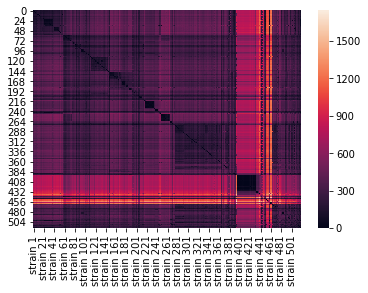

In [85]:
import seaborn as sns
print(sns.heatmap(dataa))


In [112]:
from sklearn.manifold import MDS
embedding = MDS(n_components=10,metric=True,dissimilarity='precomputed')
X_transformed = embedding.fit_transform(dataa)

In [119]:
MDS_df = pd.DataFrame(X_transformed,columns=['cluster ' + str(i) for i in range(1,11)])
print(MDS_df.head())

   cluster 1   cluster 2   cluster 3   cluster 4  cluster 5  cluster 6  \
0 -39.488065 -107.267144  -62.278440  110.278771  63.811001 -26.872162   
1 -50.699136  -96.019491  -50.770951  104.370668  76.571346  -5.993940   
2 -78.520150 -127.800213  -56.852698  123.258023  88.332692 -68.506165   
3 -52.052005 -103.982408  -68.379674  138.846098  93.797027 -20.006613   
4   4.746760 -125.131956 -115.483365  133.144273  87.124977 -44.460588   

   cluster 7   cluster 8  cluster 9  cluster 10  
0 -12.027714 -138.930998  36.303956  -94.993748  
1  22.462236 -127.821948  32.315214  -75.668435  
2  12.461068 -142.581153  -3.152247  -52.909087  
3  26.689996 -151.711125  21.197593  -56.469216  
4   6.506017 -192.842356  -8.751124  -58.117837  


In [120]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t')

In [121]:
metadata_df.head()

,strain,virus,accession,date,region,country,division,city,db,segment,authors,url,title,journal,paper_url
0,1_0015_PF,zika,KX447511,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447511,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
1,1_0016_PF,zika,KX447520,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447520,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
2,1_0030_PF,zika,KX447515,2013-11-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447515,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
3,1_0035_PF,zika,KX447514,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447514,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
4,1_0038_PF,zika,KX447517,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447517,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507


In [122]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [123]:
result_strains = pd.merge(strains_df,metadata_df, on='strain')

In [124]:
finalDf = pd.concat([MDS_df, result_strains[['region','country','strain']]], axis = 1)

In [125]:
finalDf.head()

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10,region,country,strain
0,-39.488065,-107.267144,-62.278440,110.278771,63.811001,-26.872162,-12.027714,-138.930998,36.303956,-94.993748,north_america,dominican_republic,DOM/2016/MA_WGS16_024
1,-50.699136,-96.019491,-50.770951,104.370668,76.571346,-5.993940,22.462236,-127.821948,32.315214,-75.668435,north_america,dominican_republic,DOM/2016/BB_0180
2,-78.520150,-127.800213,-56.852698,123.258023,88.332692,-68.506165,12.461068,-142.581153,-3.152247,-52.909087,north_america,dominican_republic,DOM/2016/BB_0115
3,-52.052005,-103.982408,-68.379674,138.846098,93.797027,-20.006613,26.689996,-151.711125,21.197593,-56.469216,north_america,dominican_republic,DOM/2016/BB_0208
4,4.746760,-125.131956,-115.483365,133.144273,87.124977,-44.460588,6.506017,-192.842356,-8.751124,-58.117837,north_america,dominican_republic,DOM/2016/MA_WGS16_007


In [126]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [127]:
# Import modules
with open('Data/zika_tree.json') as fh:
    json_tree_handle = json.load(fh)
#json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [128]:
tree = json_to_tree(json_tree_handle)

In [129]:
tree

Clade(branch_length=0, clade=940, name='NODE_0000520', numdate=2007.1438944876675, strain='NODE_0000520', yvalue=510.91459311393555)

In [130]:
node_data = [
    {
        "strain": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades(terminal=True)
]

In [131]:
node_data[10]

{'strain': 'V20366',
 'date': 2018.7748117727583,
 'y': 507,
 'region': 'south_asia',
 'country': 'india',
 'parent_date': 2018.510007605652,
 'parent_y': 507.5}

In [132]:
node_df = pd.DataFrame(node_data)

In [133]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,516.50,southeast_asia,THA/PLCal_ZV/2013,517
1,thailand,2016.665298,2010.921473,516.50,southeast_asia,SI_BKK01,516
2,thailand,2015.043806,2010.006479,514.25,southeast_asia,SV0010/15,515
3,thailand,2016.919918,2011.367398,513.50,southeast_asia,DMSc05684_16,514
4,thailand,2013.722793,2011.367398,513.50,southeast_asia,SK403/13AS,513


In [134]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [135]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [136]:
node_df.shape

(517, 7)

In [137]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,0.00,southeast_asia,THA/PLCal_ZV/2013,0
1,thailand,2016.665298,2010.921473,0.00,southeast_asia,SI_BKK01,1
2,thailand,2015.043806,2010.006479,2.25,southeast_asia,SV0010/15,2
3,thailand,2016.919918,2011.367398,3.00,southeast_asia,DMSc05684_16,3
4,thailand,2013.722793,2011.367398,3.00,southeast_asia,SK403/13AS,4


In [138]:
node_df["region"].unique()

array(['southeast_asia', 'south_asia', 'oceania', 'china',
       'north_america', 'south_america', 'japan_korea'], dtype=object)

In [139]:
finalDf["region"].unique()

array(['north_america', 'japan_korea', 'south_america', 'oceania',
       'china', 'southeast_asia', 'south_asia'], dtype=object)

In [140]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [141]:
merged_df.head()

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,cluster 10,region,country_x,strain,country_y,date,parent_date,parent_y,y
0,-39.488065,-107.267144,-62.278440,110.278771,63.811001,-26.872162,-12.027714,-138.930998,36.303956,-94.993748,north_america,dominican_republic,DOM/2016/MA_WGS16_024,dominican_republic,2016.517454,2016.177960,202.0,202
1,-50.699136,-96.019491,-50.770951,104.370668,76.571346,-5.993940,22.462236,-127.821948,32.315214,-75.668435,north_america,dominican_republic,DOM/2016/BB_0180,dominican_republic,2016.298426,2015.782991,188.0,188
2,-78.520150,-127.800213,-56.852698,123.258023,88.332692,-68.506165,12.461068,-142.581153,-3.152247,-52.909087,north_america,dominican_republic,DOM/2016/BB_0115,dominican_republic,2016.279261,2015.738263,171.5,172
3,-52.052005,-103.982408,-68.379674,138.846098,93.797027,-20.006613,26.689996,-151.711125,21.197593,-56.469216,north_america,dominican_republic,DOM/2016/BB_0208,dominican_republic,2016.303901,2016.145963,205.0,205
4,4.746760,-125.131956,-115.483365,133.144273,87.124977,-44.460588,6.506017,-192.842356,-8.751124,-58.117837,north_america,dominican_republic,DOM/2016/MA_WGS16_007,dominican_republic,2016.358658,2016.145963,205.0,206


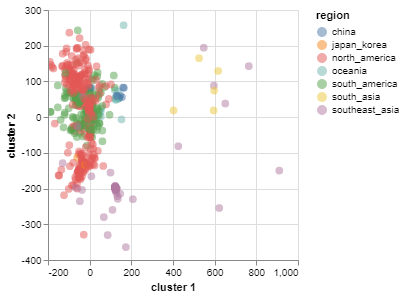

In [145]:
import altair as alt

base = alt.Chart(merged_df)
base.mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color='region',
    tooltip=['strain', 'region']
).properties(width=250,height=250).interactive()


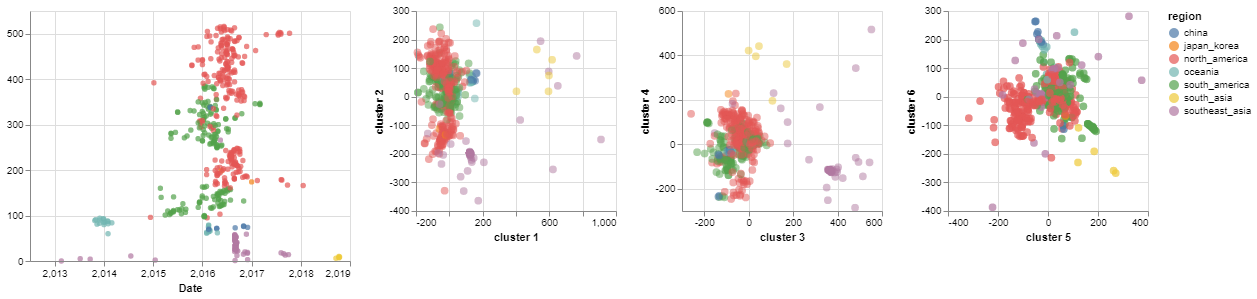

In [152]:
import altair as alt

brush = alt.selection(type='interval', resolve='global')
base = alt.Chart(merged_df)
MDS1 = base.mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(brush).properties(width=200,height=200)

MDS2 = base.mark_circle(size=60).encode(
    x='cluster 3',
    y='cluster 4',
    opacity=alt.value(0.5),
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(brush).properties(width=200,height=200)

MDS3 = base.mark_circle(size=60).encode(
    x='cluster 5',
    y='cluster 6',
    color=alt.condition(brush, 'region', alt.ColorValue('gray')),
    tooltip=['strain', 'region']
).add_selection(
    brush
).properties(
    width=200,
    height=200
)
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)
tree_name = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        title="Date"
    ),
    y=alt.Y(
        "y:Q",
        title=""
    ),
    color=alt.condition(brush, 'region:N', alt.ColorValue('gray')),
    #color="region:N",
    tooltip=["strain:N", "region:N", "date:Q"]
).add_selection(brush).properties(width=320,height=250)
#make region clickable
tree_name|MDS1|MDS2|MDS3
#pc1.encode(x='principal component 1') | pc34.encode(x='principal component 3') #link the tree to this one as well
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)